![title](UCN.png)

 #  <font color=blue> Travel Salesman Problem - TSP | Cplex | V[1]. </font>

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Campus Coquimbo | Curso - Investigación Operativa 2 & Cadena de Suministros.                    
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>


> El objetivo de este material es aplicar los conceptos de **Metaheurísticas** del curso de **investigación Operativa 2** en un contexto de **Data Science** con **_python_**.
>Para esto se utilizará un ejemplo de _Hiller & Liberman novena edición, Capítulo 13.4_. Está implementación es un ejemplo para los que no están familiarizados con el TSP. En este caso <font color='green'>**resolveremos el problema utilizando programación entera con [Cplex]**</font>
    
documentación: [IBM-CPLEX API Python](https://www.ibm.com/support/knowledgecenter/es/SSSA5P_12.5.1/ilog.odms.cplex.help/CPLEX/UsrMan/topics/APIs/Python/01_title_synopsis.html)
    
### El probelma
Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Problema_del_viajante)

El problema del vendedor viajero, problema del vendedor ambulante, problema del agente viajero o problema del viajante (TSP por sus siglas en inglés), responde a la siguiente pregunta: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen? Este es un problema NP-hard dentro en la optimización combinatoria, muy importante en la investigación de operaciones y en la ciencia de la computación.

El problema fue formulado por primera vez en 1930 y es uno de los problemas de optimización más estudiados. Es usado como prueba para muchos métodos de optimización. Aunque el problema es computacionalmente complejo, una gran cantidad de heurísticas y métodos exactos son conocidos, de manera que, algunas instancias desde cien hasta miles de ciudades pueden ser resueltas.

El TSP tiene diversas aplicaciones aún en su formulación más simple, tales como: la planificación, la logística y en la fabricación de circuitos electrónicos. Un poco modificado, aparece como: un sub-problema en muchas áreas, como en la secuencia de ADN. En esta aplicación, el concepto de “ciudad” representa, por ejemplo: clientes, puntos de soldadura o fragmentos de ADN y el concepto de “distancia” representa el tiempo de viaje o costo, o una medida de similitud entre los fragmentos de ADN. En muchas aplicaciones, restricciones adicionales como el límite de recurso o las ventanas de tiempo hacen el problema considerablemente difícil. El TSP es un caso especial de los Problemas del Comprador Viajante (travelling purchaser problem).

### Un poco de historia
El origen de los problemas del agente viajero no está claro. Una guía para agentes viajeros de 1832 menciona el problema e incluye ejemplos de viajes a través de Alemania y Suiza, pero no contiene un tratamiento matemático del mismo.

El problema del agente viajero fue definido en los años 1800s por el matemático irlandés W. R. Hamilton y por el matemático británico Thomas Kirkman. El Juego Icosian de Hamilton fue un puzzle recreativo basado en encontrar un ciclo de Hamilton.Todo parece indicar que la forma general del TSP fue estudiada, por primera vez por matemáticos en Viena y Harvard, durante los años 1930s. Destacándose Karl Menger, quien definió los problemas, considerando el obvio algoritmo de fuerza bruta, y observando la no optimalidad de la heurística de vecinos más cercanos:

Hassler Whitney de la Universidad de Princeton introdujo el nombre “travelling salesman problem” poco después.

Durante los años 1950 a 1960, el problema fue incrementando su popularidad entre el círculo de científicos de Europa y Estados Unidos. Una notable contribución fue la de <font color='green'>**George Dantzig** (_creador del simplex_)</font>, Delbert Ray Fulkerson y Selmer M. Johnson de la Corporación RAND en Santa Mónica, quienes expresaron el problema como Programación Lineal en Enteros y desarrollaron para solucionarlo el método de Planos Cortantes. Con este nuevo método, resolvieron una instancia con 49 ciudades, óptimamente, mediante la construcción de un recorrido y probando que no había un recorrido que pudiera ser más corto. En las siguientes décadas, el problema fue estudiado por muchos investigadores, matemáticos, científicos de la computación, químicos, físicos, etc.

Richard M. Karp mostró en 1972 que el Problema del Ciclo de Hamilton era un problema NP-completo, lo cual implica que el TSP sea un problema NP-hard. Esto tiene su explicación matemática por la evidente dificultad computacional para encontrar recorridos óptimos.

Gran progreso tuvo a finales de los 70s y principios de los 80s, donde Grötschel, Padberg, Rinaldi y otros, manejaron soluciones exactas para instancias con 2392 ciudades, usando Planos Cortantes y Ramificación y Acotación.

En los 90s, Applegate, Bixby, Chvátal, y Cook desarrollaron el programa Concorde, el cual es usado en muchos de los registros de soluciones recientes. Gerhard Reinelt publicó el TSPLIB en 1991, una colección de instancias de pruebas de dificultad variable, la cual es usada por muchos grupos investigativos para comparar resultados. En 2006, Cook y otros, obtuvieron un recorrido óptimo para 85,900 ciudades dado por un problema de diseño de microchip, actualmente TSPLIB es la instancia más larga resuelta. Para otras muchas instancias con millones de ciudades, la solución puede ser encontrada garantizando que la solución contiene un 2-3% del recorrido óptimo.


### Formulación del Problema
Definiremos C como el conjunto de todas las ciudades que se desean visitar y como $c_i$ el nodo $i$ que representa la $ciudad\;i$.La variable de decisión binaria $x_{i,j}$ que represetna ir de la ciudad $i$ a la $j$ doonde $x_{i,j}$=$(0,1)$. A **$A$** como los arcos formados entre la ciudad $i$ y la ciudad $j$, donde $i\neq j$, siendo $d_{i,j}$ la distancia entre la ciudad $i$ y la ciudad $j$.

\begin{equation}
Min\;Z=\displaystyle\sum_{\forall \;A} x_{ij}d_{ij}
\end{equation}
$s.t$
\begin{equation}
\displaystyle\sum_{\forall \;i \; \in \; Ciudades} x_i=1
\end{equation}
\begin{equation}
\displaystyle\sum_{\forall \;j \; \in \; Ciudades} x_j=1
\end{equation}
\begin{equation}
c_i+1\geq c_j+M(1-x_{ij})
\end{equation}


**Para resolver este problema seguiremos los siguientes paso:**

1. Paso 1: Crearemos los datos: Ciudades y Distancias.
2. Paso 2: Gráficaremos ( no necesario)
3. Paso 3: Crearemos el modelo en Cplex: Función Objetivo y Restricciones
4. Paso 4: Resolveremos con CPlex
5. Paso 5: Graficaremos la solución.

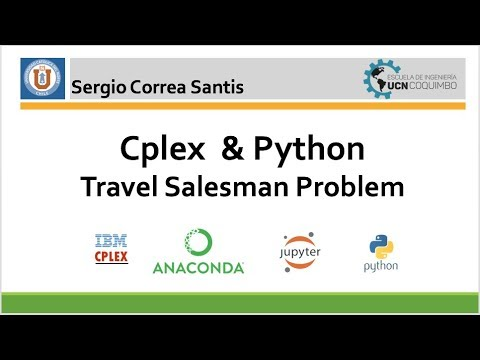

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('1BEwkOBs67o')

In [2]:
#Comenzaremos importanto las librerias necesarias.
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

### <font color=blue> Creanción de los datos del Modelo </font>

In [3]:
#Estamos trabajando con datos ficticios, por lo cual se creará un set de ciudades y arcos.
# Los ciclos for están dentro de [ ], para crear listas con esa cantidad de datos.
n=11
ciudades=[i for i in range(n)] # Creamos ciudades de la 0 a la 9  
arcos =[(i,j) for i in ciudades for j in ciudades if i!=j]

In [4]:
#Ahora crearemos las cordenadas para cada ciudad.
random=np.random
random.seed(1)
coord_x=random.rand(n)*100
coord_y=random.rand(n)*100
print(" Cordenadas de X para todas las ciudades")
print(coord_x)
print("---------------------------------------------------------------------")
print(" Cordenadas de y para todas las ciudades")
print(coord_y)

 Cordenadas de X para todas las ciudades
[  4.17022005e+01   7.20324493e+01   1.14374817e-02   3.02332573e+01
   1.46755891e+01   9.23385948e+00   1.86260211e+01   3.45560727e+01
   3.96767474e+01   5.38816734e+01   4.19194514e+01]
---------------------------------------------------------------------
 Cordenadas de y para todas las ciudades
[ 68.52195004  20.44522497  87.81174364   2.73875932  67.04675102
  41.73048024  55.86898284  14.03869386  19.81014891  80.07445687
  96.82615757]


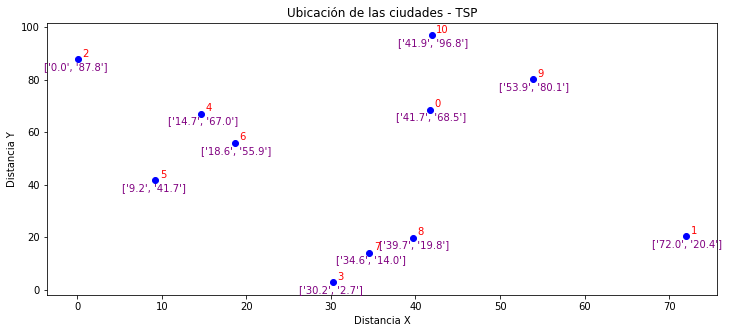

In [5]:
x=coord_x
y=coord_y

plt.figure(figsize=(12,5))
plt.scatter(x,y,color='blue')
s=[]
for n in range(len(coord_x)):
    s_temp=[]
    s_temp.append("%.1f" %coord_x[n])
    s_temp.append("%.1f" %coord_y[n])
    s.append(s_temp)

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")

for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]-4,coord_y[n]-4), 
                 color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='red')

plt.show()

In [6]:
#Ahora debemos crear un link entre las las ciudades, sus coordenadas y la distancia entre ellas.

#Los parentesis de llave significan que es un diccionario { }.De esta manera creamos un link
# entre los arcos y la distancia.

distancia={(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i,j in arcos}

### <font color=blue> Creando el modelo a resolver </font>

In [7]:
# Creando el modelo en Cplex
mdl=Model('TSP')

In [8]:
#Declaramos las variables a utilizar
#los nombre y forma de llamar las variables es propia de CPLEX.

x=mdl.binary_var_dict(arcos,name='x')
d=mdl.continuous_var_dict(ciudades,name='d')

#### <font color=green> Función objetivo del TPS </font>
\begin{equation}
Min\;Z=\displaystyle\sum_{\forall \;A} x_{ij}c_{ij}
\end{equation}

In [9]:
mdl.minimize(mdl.sum(distancia[i]*x[i] for i in arcos))

#### <font color=green> Restricciones del TPS </font>
\begin{equation}
\displaystyle\sum_{\forall \;i \; \in \; Ciudades} x_i=1
\end{equation}
\begin{equation}
\displaystyle\sum_{\forall \;j \; \in \; Ciudades} x_j=1
\end{equation}
\begin{equation}
c_i+1\geq c_j+M(1-x_{ij})
\end{equation}

In [10]:
# Primero restricción sumatoria para todo i
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i==c)==1, 
                       ctname='out_%d'%c)

In [11]:
# Segundo restricción sumatoria para todo j
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j==c)==1, 
                       ctname='in_%d'%c)

In [12]:
#print(mdl.export_to_string())

In [13]:
# Por último restricción lógica
for i,j in arcos:
    if j!=0:
        mdl.add_indicator(x[(i,j)],d[i]+1==d[j], 
                          name='order_(%d,_%d)'%(i, j))

In [14]:
mdl.parameters.timelimit=120
mdl.parameters.mip.strategy.branch=1
mdl.parameters.mip.tolerances.mipgap=0.15

solucion = mdl.solve(log_output=True)

CPXPARAM_TimeLimit                               120
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201703173
CPXPARAM_MIP_Strategy_Branch                     1
CPXPARAM_MIP_Tolerances_MIPGap                   0.14999999999999999
Tried aggregator 2 times.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 77 rows, 176 columns, and 385 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 100 indicators.
Presolve time = 0.02 sec. (0.33 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Tried aggregator 1 time.
Reduced MIP has 77 rows, 176 columns, and 385 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 100 indicators.
Presolve time = 0.01 sec. (0.26 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Clique table members: 67.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution

In [15]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [16]:
solucion.display()

solution for: TSP
objective: 310.621
x_(0, 9) = 1
x_(1, 8) = 1
x_(2, 4) = 1
x_(3, 1) = 1
x_(4, 6) = 1
x_(5, 7) = 1
x_(6, 5) = 1
x_(7, 3) = 1
x_(8, 0) = 1
x_(9, 10) = 1
x_(10, 2) = 1
d_1 = 9.000
d_2 = 3.000
d_3 = 8.000
d_4 = 4.000
d_5 = 6.000
d_6 = 5.000
d_7 = 7.000
d_8 = 10.000
d_9 = 1.000
d_10 = 2.000


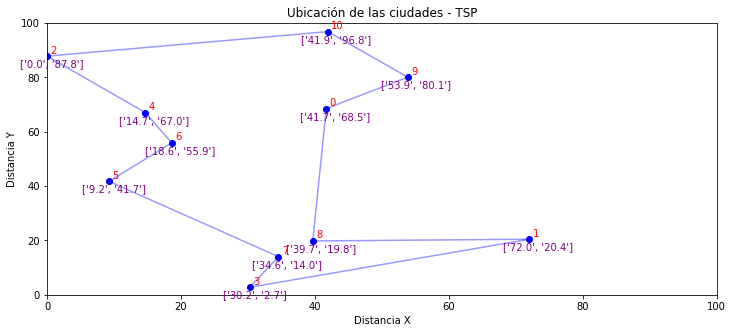

In [17]:
#Imprimiento la solución óptima.

plt.figure(figsize=(12,5))
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")


arcos_activos = [i for i in arcos if x[i].solution_value > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='blue', zorder=1)
    
for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]-4,coord_y[n]-4), color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]+0.5,coord_y[n]+1),color='red')
    
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()

#  <font color=green> Travel Salesman Problem - TSP | Cplex | V[1]. </font>

Si estan interesado en los que son los problemas **np-complete** y **np-hard**, especialmente en la pregunta P v/s NP,les dejos 2 videos relacionados. 

>**El primero** es el trailer de una **pelicula** llamada **"Traveling Salesman"**. Si, hay una pelicula sobre este problema. 
>**El Segundo** es el **mejor video** que he encontrado sobre este tema **P v/s NP**. Si bien está en ingles, los subtitulos funcionan bien y la explicación es muy buena. 

Espero que los disfruten -.-!!!!

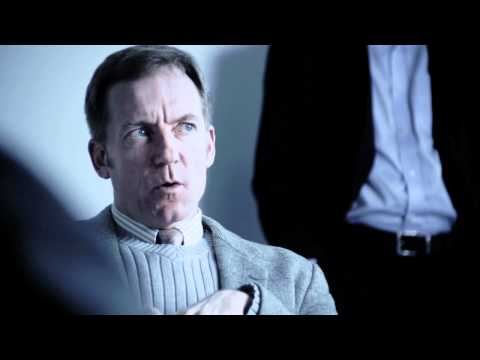

In [18]:
# Four mathematicians are hired by the US government to solve the most powerful 
# problem in computer science history
# Director: Timothy Lanzone
# Writers: Andy Lanzone, Timothy Lanzone
# Stars: Danny Barclay, Eric Bloom, David John Cole 
YouTubeVideo('6ybd5rbQ5rU')

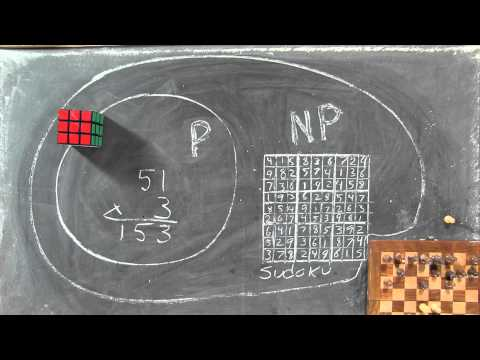

In [19]:
# Youtube channel: hackerdashery
# Published on Aug 26, 2014
YouTubeVideo('YX40hbAHx3s')

<div class="alert alert-info"> </h4> **Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Campus Coquimbo | Curso - Investigación Operativa 2 & Cadena de Suministros.**                    
© Sergio Correa Santis, Ingenerio Industrial UCN, Master of International Business UQ, Master Engeneering of Supply Chain and Logistics, MIT ZLC-Global Scale.                               Contacto: sergio.correa@ucn.cl o sergio.correa.santis@gmail.com
</h4> </div>